Welcome to the first homework for BI594: Quantitative Microbiology. In this homework, we will do some introductory python exercises and then do a few problems about microbial growth. This homework may look long, but a lot of it is my writing describing the problems! Let me know if you're having trouble.

One quick note: throughout the assignments I will often use special formatting in the markdown cells to make things look nice. If you want to do that yourself, check out this page on how to do formatting in jupyter markdown cells: https://www.ibm.com/support/knowledgecenter/SSHGWL_1.2.3/analyze-data/markd-jupyter.html.    

In [10]:
"""
    Throughout the assignment there are comments to serve as a guide.
    Comments are marked either by a # sign for a single-line comment
    or 3 quotation marks for multi-line blocks of comments like what
    you're reading here.
"""

# These are all the python libraries you'll need

import numpy as np # numpy for making arrays and doing math on them
import pandas as pd # pandas for importing spreadsheet data and manipulating it
import scipy as sp # scipy for solving equations
import matplotlib as mpl # matplotlib for graphing
import matplotlib.pyplot as plt # the pyplot functions from mathplotlib as plt
import math # math for things like constants (e or pi) and some simple math
from PIL import Image

figsize=(7.5,5)

fc = '\033[91m'
warnc = '\033[93m'
endc = '\033[0m'

***Problem 1. Getting to know python***

The basic python tasks for this course are
    
    -performing computations
    -importing data
    -creating graphs
    
We'll do those and learn a bit about python at the same time.

**Problem 1(a). Basic commands and graphs.**

In [11]:
"""
    One of the most important things in this class is defining numbers for the x-axis of a graph.
    We'll need a list of evenly spaced numbers. For this, we will use a numpy function
    called linspace. Here's how it works.
"""

# numpy.linsapce takes three arguments, the first number in the sequence, the last number in the sequence, and the number of ticks
# to divide the sequence into. For example:

zero_through_ten = np.linspace(0,10,11)
print(zero_through_ten)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


**Problem 1(b). Making graphs**

Now that we know how to make evenly spaced arrays of numbers, we can make very nice graphs with matplotlib.

In lecture, we saw that for diffusive motion, the average distance a particle travels is proportional to the square root of time. Specifically, in three dimensions, the averge distance traveled is $\sqrt{6Dt}$. Assume that the diffusion constant (that's D) for a 30 kD protein in the cell is 10 $\mu m^{2}/s$ (Cell Biology by the Numbers; Milo, Phillips, and Orme) and the average speed of a kinesin molecular motor is 0.815 $\mu m/s$ (https://doi.org/10.1038/35036345).

Plot the average distance a 30 kD protein will travel on average for diffusion and for transport by kinesin on the same graph for times between 0 and 600 seconds. Create a legend on the graph and label the axes. I urge you to make the graph look as distinctive as you can with the colors and line or marker types for the graph! (https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html?highlight=plot)

# <font color = 'red'> Problem 1 b)

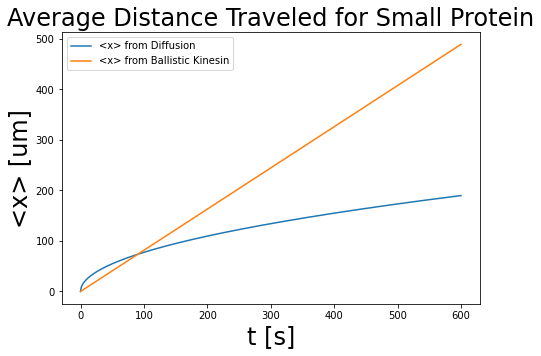

In [12]:
# Create graph here. np.sqrt() will probably be useful.

t = np.linspace(0,600,601)
D_small = 10e-12
v = .815e-6

x_diff_s = np.sqrt(6*D_small*t)
x_bali = v*t

fig, ax = plt.subplots(figsize=figsize)
ax.set_title('Average Distance Traveled for Small Protein',fontsize =24)
ax.set_ylabel('<x> [um]',fontsize =24)
ax.set_xlabel('t [s]',fontsize =24)
ax.plot(t, x_diff_s*1e6, label = '<x> from Diffusion')
ax.plot(t, x_bali*1e6, label = '<x> from Ballistic Kinesin')

ax.legend();


Using the graphs, estimate the _distance_ at which transport by kinesin starts to outpace diffusion. Feel free to create a new cell below to make this graph. For this, it may be helpful to zoom in on the axes (for example https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xlim.html).

<font color ='red'> We expect the exact crossover point to correspond to $vt= \sqrt{6Dt} \ \therefore \ t= \frac{6D}{v^2}$
    
I find this below;

In [13]:
print(fc+'crossover t~',"{:.2f}".format(6*D_small/(v**2)),"s"+endc)
print(fc+'crossover x~',"{:.2f}".format(6*D_small/v*1e6),'um'+endc)
# print('crossover x~',"{:7.2e}".format(x_diff[int(6*D/(v**2))]),"m")
# print('crossover x~',"{:7.2e}".format(x_bali[int(6*D/(v**2))]),"m")

crossover t~ 90.33 s
crossover x~ 73.62 um


<font color ='red'> This agrees with the observed crossover on the graph.

Given the above, you may wonder why large cells use expensive motor protein systems at all. The key is that for larger particles the diffusion constant inside the cell is _extremely small_. This is due to crowding by all the other stuff in the cytoplasm. For a larger, 70 kDa protein, the diffusion constant in _E. coli_ can be as small as 0.03 $\mu m^{2}/s$! Make the same graph as above for this situation and estimate the distance over which motor protein transport outpaces diffusion.

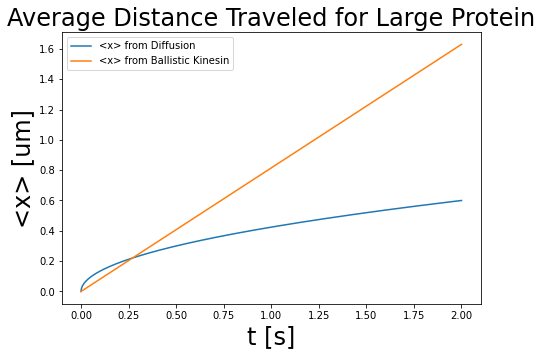

In [14]:
D_big =.03e-12
t_b = np.linspace(0,2,1000)

x_diff_b = np.sqrt(6*D_big*t_b)
x_bali_b = v*t_b

# Make your graph here.

fig1, ax1 = plt.subplots(figsize=figsize)
ax1.set_title('Average Distance Traveled for Large Protein',fontsize =24)
ax1.set_ylabel('<x> [um]',fontsize =24)
ax1.set_xlabel('t [s]',fontsize =24)
ax1.plot(t_b, x_diff_b*1e6, label = '<x> from Diffusion')
ax1.plot(t_b, x_bali_b*1e6, label = '<x> from Ballistic Kinesin')

ax1.legend();

In [15]:
print(fc+'crossover t~',"{:.2f}".format(6*D_big/(v**2)),"s"+endc)
print(fc+'crossover x~',"{:.2f}".format(6*D_big/v*1e6),'um'+endc)

crossover t~ 0.27 s
crossover x~ 0.22 um


<font color ='red'> Again this agrees with the observed crossover on the graph.

Now you see how, if you want to be a big cell, you will simply need to evolve a better system for transporting cargo in the cell than diffusion. We have understood this constraint using relatively simple arguments from physics. This shows the remarkable ability for life and evolution to explore the laws of physics and chemistry to create new systems that give itself more opportunities to reproduce. Amazing!

**Problem 1(c). Importing data**

In this problem, we'll import some real data from this paper: https://journals.plos.org/plosbiology/article?id=10.1371/journal.pbio.0030045

The data contains the number of E. coli cells growing on an agar substrate with rich nutrients over time. You can watch the microcope movie that this data is extracted from at the above link under Supporting Information > Video S1.

In [16]:
"""
    We'll import the CSV file containing E coli growth data with the pandas function read_csv.
    With this function you can import csv data (csv is a spreadsheet file format) from a location
    on you computer or on the internet. I've placed the data on my lab website at https://www.larkinlab.com/s/N_cells.csv.
    The columns in the csv file represent time in minutes and number of E. coli cells.
""" 

# import the data into a pandas dataframe using pd.read_csv() by supplying the url of the data to the function as a string.
# pd.read_csv() returns a pandas dataframe. Creat a variable to store the data.

# print out the data here to see what the columns are called and what the values are.

ecdf = pd.read_csv('https://www.larkinlab.com/s/N_cells.csv')
# print(ecdf)

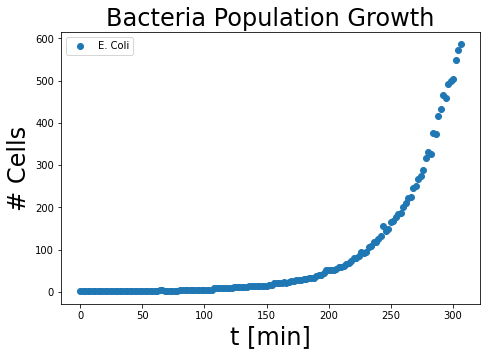

In [17]:
# create a plot of the number of cells as a function of time. Label the axes!
fig2, ax2 = plt.subplots(figsize=figsize)
ax2.scatter(ecdf['time_min'], ecdf['N_cells'],label='E. Coli')
ax2.set_title('Bacteria Population Growth',fontsize =24)
ax2.set_ylabel('# Cells',fontsize =24)
ax2.set_xlabel('t [min]',fontsize =24)
ax2.legend();

This looks exponential. Let's estimate the doubling time. We'll do that by first taking the base-2 log of the number of cells and plotting it. If the cells are growing exponentially, the log should look linear when plotted in time.

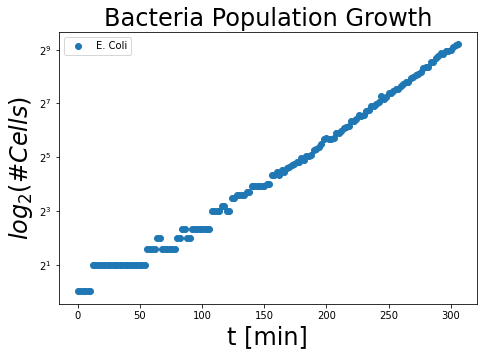

In [45]:
# add a new column to your pandas dataframe that's the log base-2 of the number of cells using np.log2()
ecdf['log2_N_cells'] = np.log2(ecdf['N_cells'])

# create a plot of the log base-2 as a function of time. As always, label the axes!
fig3, ax3 = plt.subplots(figsize=figsize)
ax3.scatter(ecdf['time_min'], ecdf['N_cells'],label='E. Coli')
ax3.set_title('Bacteria Population Growth',fontsize =24)
ax3.set_ylabel(r'$log_2(\# Cells)$',fontsize =24)
ax3.set_xlabel('t [min]',fontsize =24)
ax3.set_yscale('log',base=2)
ax3.legend();

You should see that after roughly 150 minutes, the log2 plot looks very linear. The slight non-linearity before that is likely due to two factors: 1) the cells have probably just been put into a new environment on the microscope and are becoming acclimated to this envionrment before expressing the genes for exponential growth and 2) there are a very small number of cells, making the curve noisy.

Remember that each tick of 1 on the y-axis for this log plot corresponds to the number of cells doubling. Using this fact, estimate the doubling time for these cells during the exponential phase of their growth from the graph above.

<font color = 'red'> slope = 1/t_double , therefore t_double = 1/slope  [min]

In [19]:
from scipy.stats import linregress

y = ecdf['log2_N_cells']
x = ecdf['time_min']
# slope = 1/3*((y[100]-y[75])/(x[100]-x[75])+(y[125]-y[100])/(x[125]-x[100])+(y[125]-y[100])/(x[125]-x[100]))
# print('My dumb guess',slope)

slope, intercept, r_value, p_value, std_err = linregress(x,y)

print(fc+'Scipy simple linear regression result: slope=', slope,endc+' \n ')

t_double = 1/slope
print(fc+'Double Time: t_double~',"{:.2f}".format(t_double),"min"+endc)

Scipy simple linear regression result: slope= 0.030065915172748935  
 
Double Time: t_double~ 33.26 min


***Problem 2. Building E. coli cells.***

We'll go over some numbers to build quantitative intuition for what makes a single bacterial cell.

We place a single _E. coli_ cell in a tube containing 5 mL of a minimal growth medium. The medium contains 0.5% w/v glucose (C<sub>6</sub>H<sub>12</sub>O<sub>6</sub>), 5 mM ammonium chloride (NH<sub>4</sub>Cl), and several salts. w/v % is a rather unfortunate unit that is in fact not a percentage at all. It is the grams of solute per 100 mL of solution. 10 g of glucuse dissolved in a solution that is 100 mL total would be a 10 % w/v glucose solution. This is a standard unit system for solutions of sugars and amino acids in microbial growth media. It will be useful to look up molar masses of these compounds for this problem.

We place the tube in a shaker (which keeps a steady supply of air to the growth media) held at 37 °C. After an initial period of adjustment, which we'll ignore, the cell culture begins to grow with a doubling time of 45 minutes.

**2(a).** Write an equation that gives $N(t)$, the number of cells in the culture tube as a function of time in _hours_. Ignore that transient period of the cells getting used to the growth medium. So t = 0 is right where the culture starts growing with a 45 minute doubling time.

# <font color = 'red'> Problem 2

   <font color = 'red'>$ N(t) = N_o \cdot 2^{t/t_o} $
   
   <font color = 'red'> For $N_o$ the number of cells at t=0, and $t_o$ the doubling time. We assume one initial cell below.

**2(b).** Create a line plot of the number of cells in the culture tube from t = 0 to t = 3 hours. Make sure your axes are labeled!

In [20]:
t_double = 45
t = np.linspace(0, 180, 181)
N_t  = np.power(2,t/t_double)

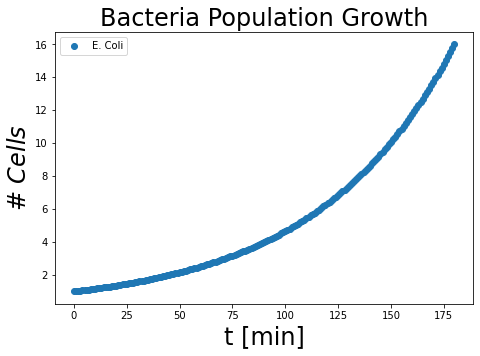

In [21]:
# Create your plot here. The numpy function np.exp2() may be useful.

fig4, ax4 = plt.subplots(figsize=figsize)
ax4.scatter(t, N_t,label='E. Coli')
ax4.set_title('Bacteria Population Growth',fontsize =24)
ax4.set_ylabel(r'$\# \ Cells$',fontsize =24)
ax4.set_xlabel('t [min]',fontsize =24)
# ax4.set_yscale('log',basey=2)
ax4.legend();

In [22]:
print(fc+'# Cells after 3 hours: ',int(N_t[180]),endc)

# Cells after 3 hours:  16 


You should see that after 3 hours there are barely any cells in the tube! This is the nature of exponential growth. At low population sizes, the growth rate is tiny, but it eventually become huge. If you want, extend the range of your graph to see when growth becomes super fast.

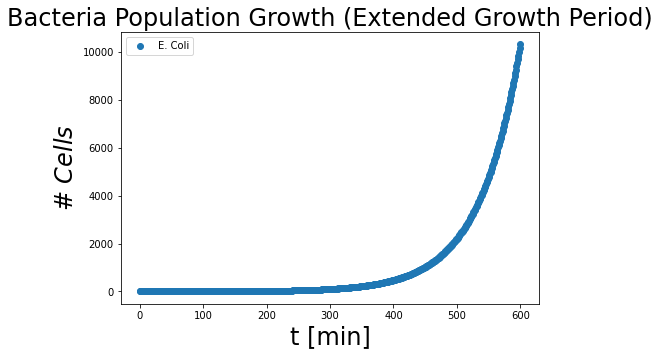

In [23]:
t_double = 45
t = np.linspace(0, 600, 601)
N_t  = np.power(2,t/t_double)


fig4, ax4 = plt.subplots(figsize=figsize)
ax4.scatter(t, N_t,label='E. Coli')
ax4.set_title('Bacteria Population Growth (Extended Growth Period)',fontsize =24)
ax4.set_ylabel(r'$\# \ Cells$',fontsize =24)
ax4.set_xlabel('t [min]',fontsize =24)
# ax4.set_yscale('log',basey=2)
ax4.legend();

In [24]:
print(fc+'# Cells after 10 hours: ', int(N_t[600]),endc)

# Cells after 10 hours:  10321 


**2(c).** The dry weight of the *E. coli* cell is 0.3 pg. An *E. coli* is roughly 50% carbon and 14% nitrogen. Glucose and ammonium are, respectively, the only sources of carbon and nitrogen in the growth medium. Estimate, respectively, how many molecules of glucose and ammonium are required to make one new cell. Feel free to either type your answer in the cell below, do all your math below, or, for extra credit, do the math on paper, take a photo, import the image file, and display it. If you do that, please still write the final answer. For some help, check out https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.imread.html#matplotlib.pyplot.imread and https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.imshow.html.

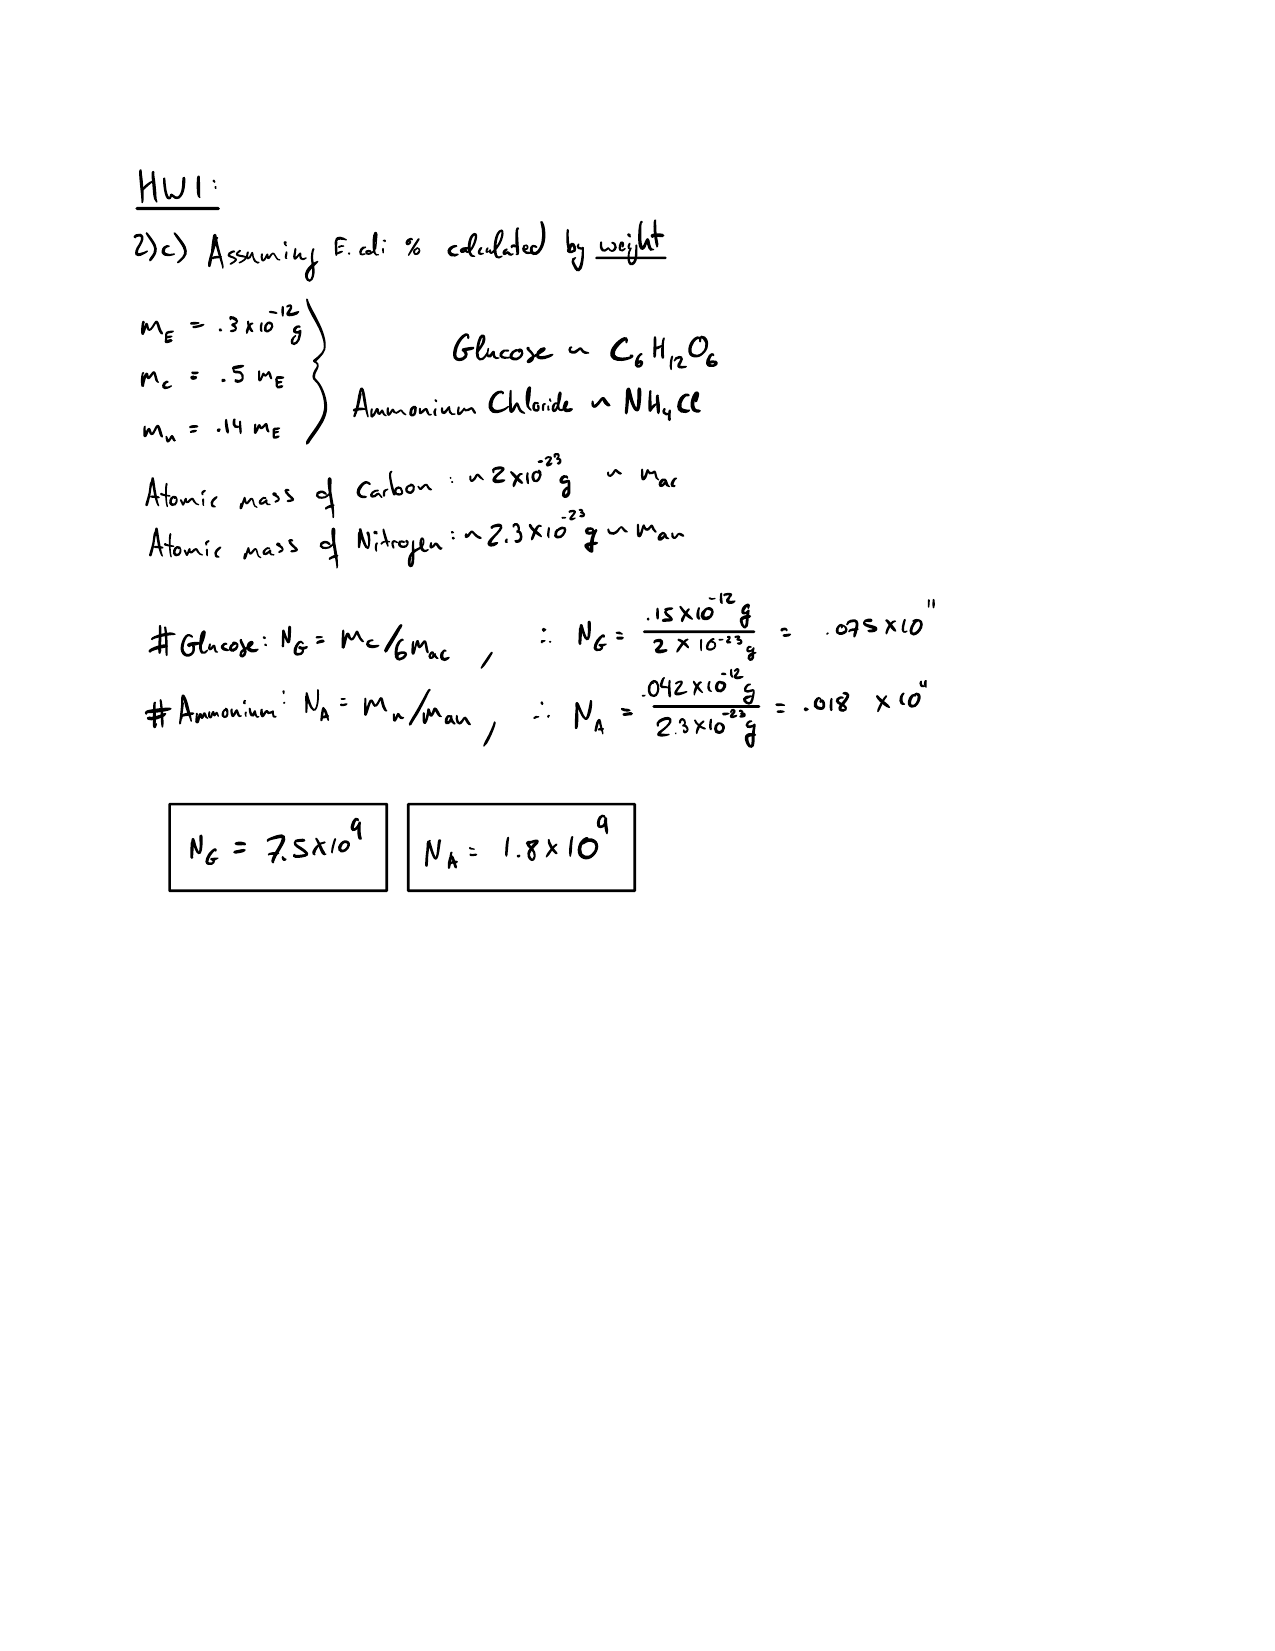

In [37]:
# Write answer here or import an image of your work.
work = Image.open('BI_594-1.png')
# work.show()
display(work)

**2(d).** If the doubling time under these conditions is 45 minutes, estimate on average how many glucose molecules per second are assimilated by a cell to build a second cell.

<font color = 'red'> Assuming linear uptake: $N_G(t) = \frac{t}{t_d} (N_G^{max})$
    , $N_n(t) = \frac{t}{t_d} (N_n^{max})$

In [26]:
# Write answer here and/or do math here.
print(fc+'# Glucose assimilated after 1 second: ', "{:1.2e}".format(1/(45*60)*7.5e9),endc)
print(fc+'# Ammonium assimilated after 1 second: ', "{:1.2e}".format(1/(45*60)*1.8e9),endc)

# Glucose assimilated after 1 second:  2.78e+06 
# Ammonium assimilated after 1 second:  6.67e+05 


**2(e).** What is the maximum cell density that this culture can achieve under these conditions given the limited nutrients? Express your answer in terms of optical density or OD. OD is defined as the attenuation of 600 nm wavelength light through 1 cm of culture. OD is directly proportional to the cell density and 1 unit of OD corresponds to a concentration of roughly 10<sup>9</sup> *E. coli* cells per mL.

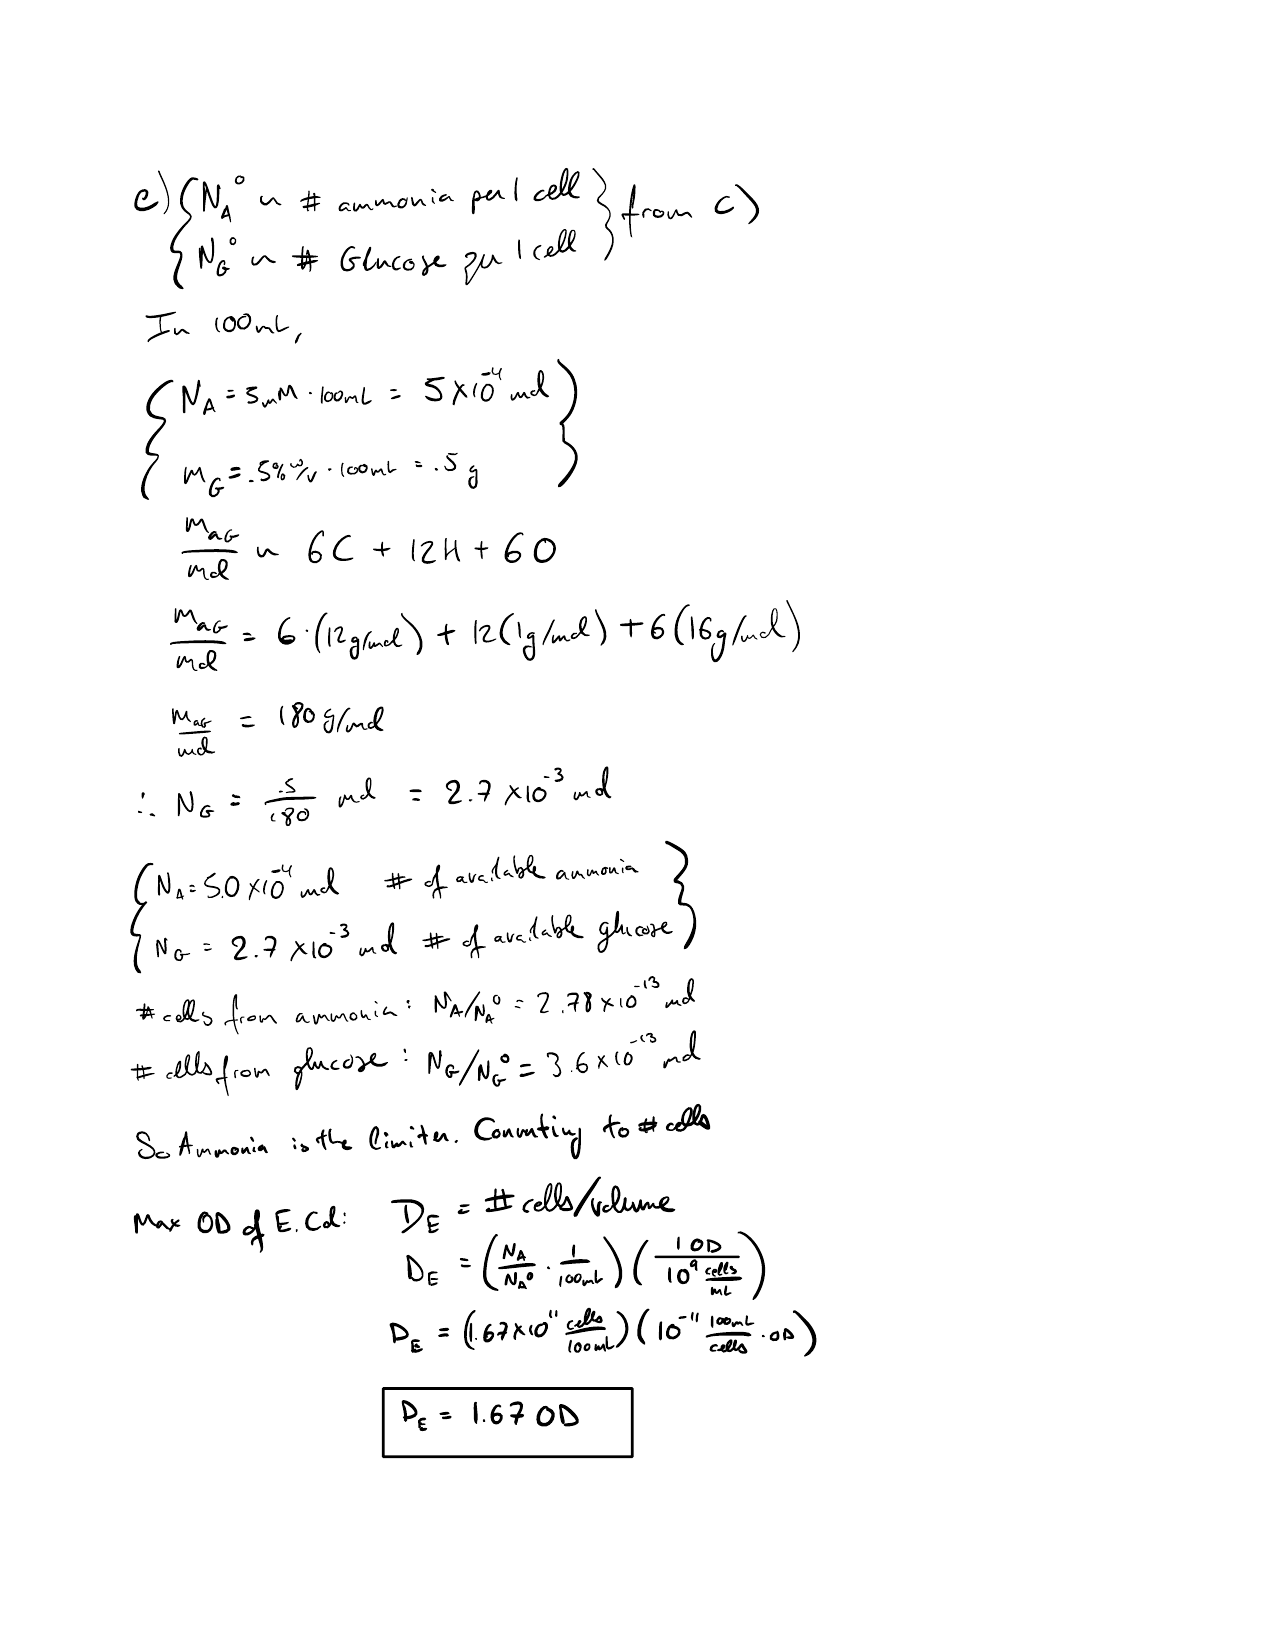

In [40]:
# Write answer here and/or do math here.
work = Image.open('BI_594-2.png')
display(work)

**2(f).** If the initial number of cells is not 1, but a more realistic starting culture density of 10^7 cells per mL, how long does it take the culture to reach this density?

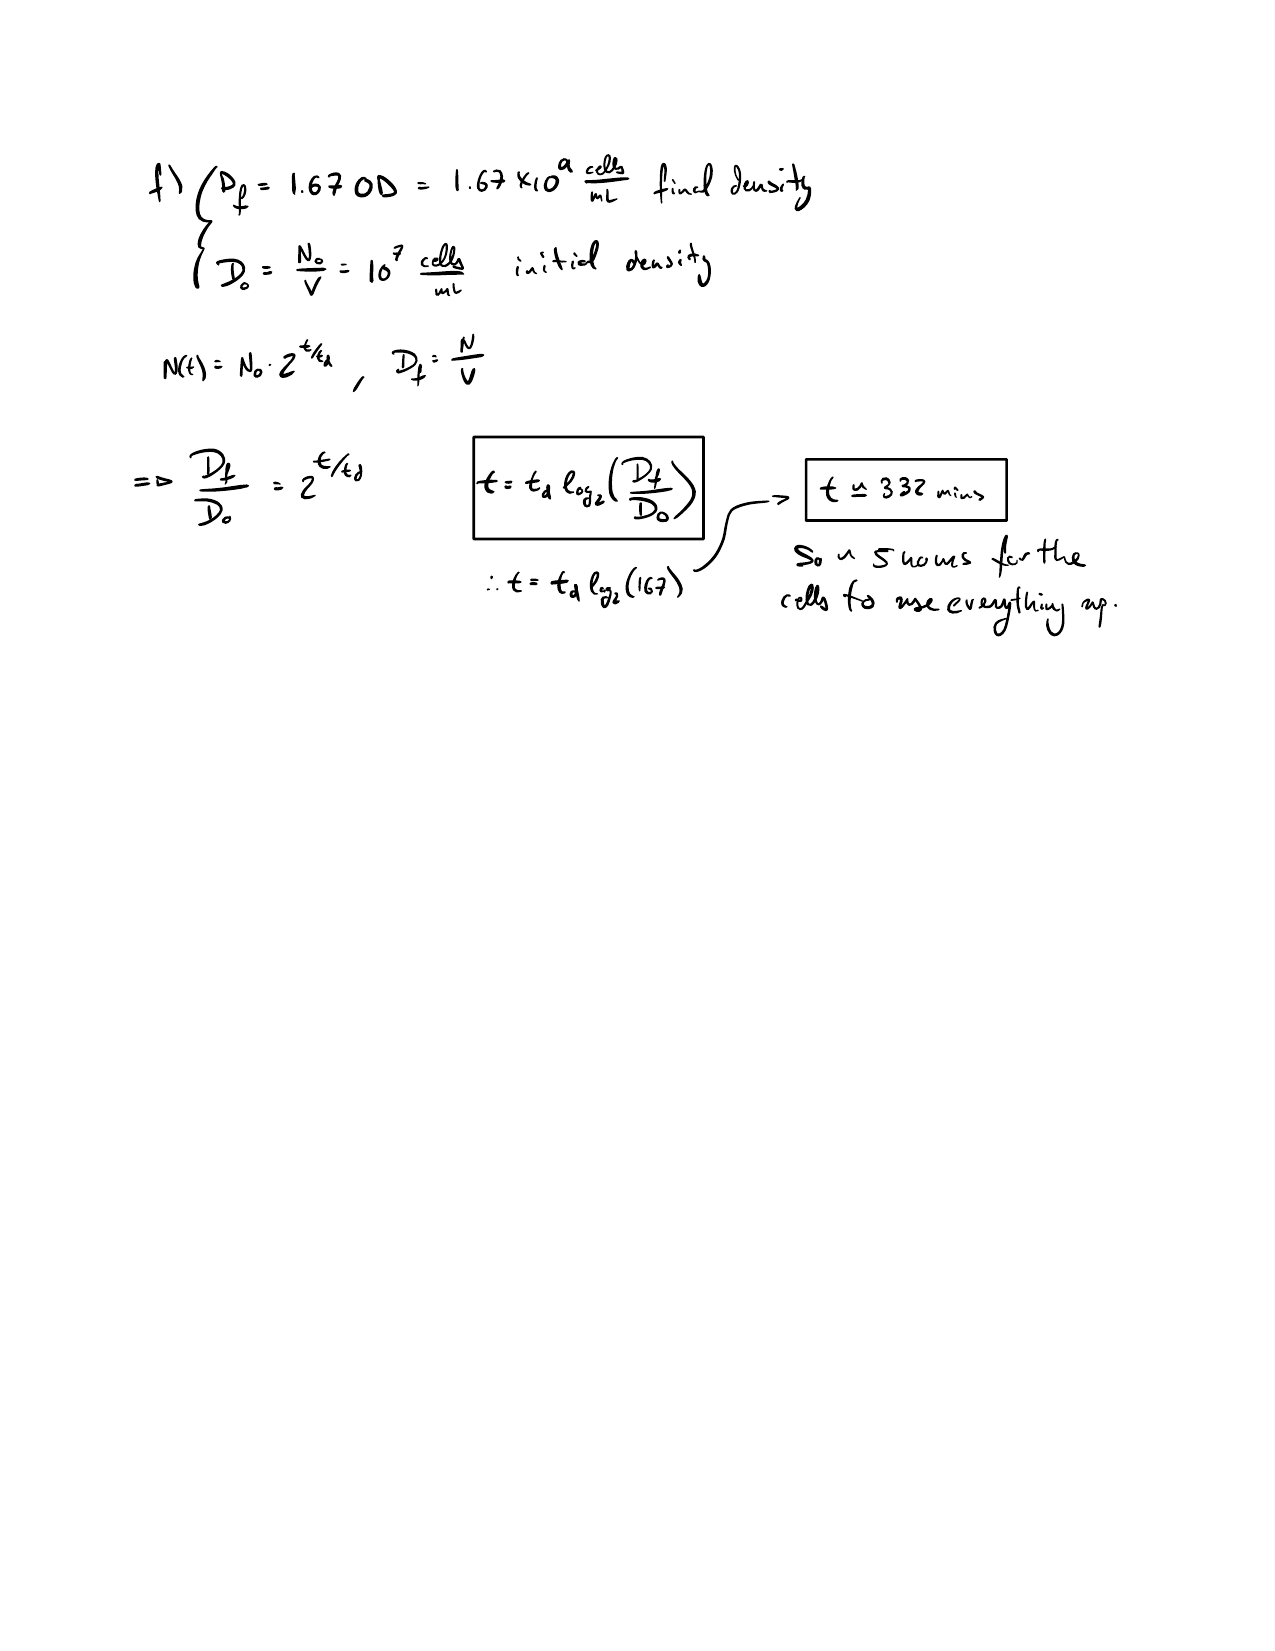

In [39]:
# Write answer here and/or do math here.
work = Image.open('BI_594-3.png')
display(work)

***Problem 3. What are the actual doubling times of different microbes?***

In this problem we'll look at what various measured doubling times actually are for exponentially growing cells.

**3(a).** Importing the table.

In [42]:
# We'll import a CSV file containing E coli doubling time data from the internet: https://www.larkinlab.com/s/doubling_time_list.csv.
dtdf = pd.read_csv('https://www.larkinlab.com/s/doubling_time_list.csv')

# print out the dataframe to see the columns or look at the csv file in excel.
# print(dtdf)

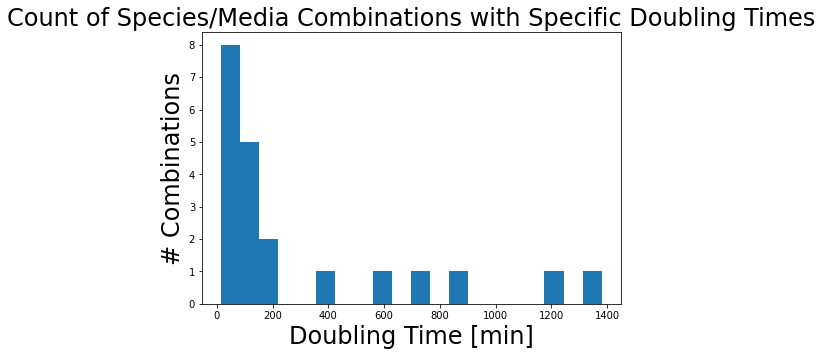

In [31]:
# create a histogram of the doulbing times from this survey of the literature using plt.hist() See https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist.
fig5,ax5 = plt.subplots(figsize=figsize)
ax5.hist(dtdf['doubling_time_minutes'],bins=20)
ax5.set_title('Count of Species/Media Combinations with Specific Doubling Times',fontsize =24)
ax5.set_ylabel('# Combinations',fontsize =24)
ax5.set_xlabel('Doubling Time [min]',fontsize =24);
# ax5.legend()

With these very long doubling times, it's difficult to get a feel for how long that doubling time is. Create a new colummn in the dataframe that's the doubling time in hours and plot a histogram of that with 20 bins.

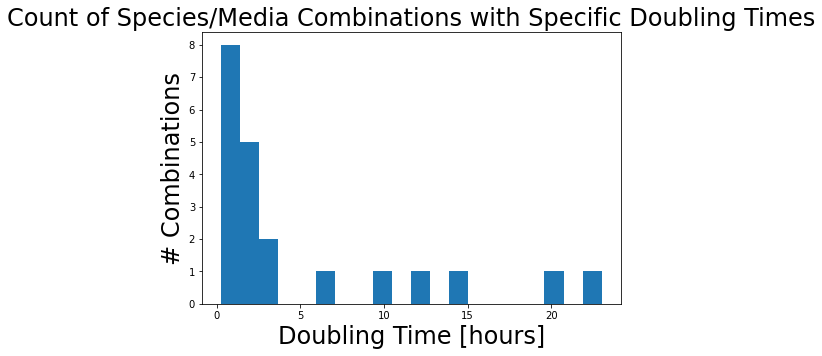

In [32]:
# Write code here.
dtdf['doubling_time_hours'] = dtdf['doubling_time_minutes']/60

fig6,ax6 = plt.subplots(figsize=figsize)
ax6.hist(dtdf['doubling_time_hours'],bins=20)
ax6.set_title('Count of Species/Media Combinations with Specific Doubling Times',fontsize =24)
ax6.set_ylabel('# Combinations',fontsize =24)
ax6.set_xlabel('Doubling Time [hours]',fontsize =24);

**3(b)**. In problem 2, we saw that in a typical lab growth medium, _E. coli_ grows with a 45-minute doubling time. In problem 2(f), you found the time it takes an innoculum of 10^7 cells per mL to reach this density. Now let's say we're studying the growth of _Mycobacterium bovis_, which we see in our table has a doubling time of 23 hours in minimal media! Starting from the same initial cell density as our _E. coli_ experiment, how long would it take this culture to reach the same density?

<font color = 'red'> From 2(f) we know;  $t=t_d log_2(167)$  For E. Coli. The number 167 is the ratio of initial to final density, which we recall is dependant on how many cells can be made with the available media. Assuming the Mycobacterium cells have roughly the same relative 50% carbon and 14% nitrogen composition as E. Coli, we can simply plugin the new doubling time of 23 hours. 
    
  <font color = 'red'>  In the Mycobacterium case then, $t \approx 170 \ hours $
    
<font color = 'red'> This assumption seemed to match up with various sources, for example https://www.thewastewaterblog.com/single-post/2017/04/30/bacteria-cell-composition#:~:text=Composition%20of%20a%20Bacterial%20Cell&text=About%2053%20percent%20by%20weight%20of%20the%20organic%20fraction%20is%20carbon.

**3(c).** Let's say we're trying to grow a culture of _Mycobacterium bovis_ in minimal glycerol. From the table we see that's a 23-hour doubling time! In this medium, the _E. coli_ grow with a doubling time of 2.5 hours. For now, we'll treat the two species growing together as if they are on their own, i.e. neither one influences the growth of the other (we'll learn how to model this interaction later!), and each divides in the mixed culture with the same doubling time as they do on their own.
    
We start out with 50000 initial M. bovis cells. By accident, the culture is contaminated with only 100 _E. coli_ cells. We saw in 3(c) that go get enough cells for an experiment, you need to grow _M. bovis_ for a long time! After 24 hours, how many _M. bovis_ cells are in the culture? How many _E. coli_ cells?

<font color = 'red'> $ N_e(t) = N_e^o \cdot 2^{t/t_e}, \ \ t_e =2.5hrs, \ N_e^o= 100$ 
    
<font color = 'red'> $ N_m(t) = N_M^o \cdot 2^{t/t_m}, \ \ t_m =23hrs, \ N_m^o= 50000 $
           
<font color = 'red'> $ \therefore N_e(24hrs) =7.76x10^4 \ cells$ 
    
<font color = 'red'> $ \therefore N_m(24hrs) =1.03x10^5 \ cells$ 

**3(d).** Considering the above two questions why do experimenters not use slow-growing microbes for lab experiments unless it's absolutely necessary for their research questions?

<font color = 'red'> Contaminant microbes will rapidly out-grow the focus colony, and so effects such as inter-species competition and other interactions will have to be accomodated for. 